In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import pickle
from utility import *
%load_ext autoreload
%autoreload 2

In [2]:
df1_train = pd.read_csv('data/train_transaction.csv')
df2_train = pd.read_csv('data/train_identity.csv')
df1_test = pd.read_csv('data/test_transaction.csv')
df2_test = pd.read_csv('data/test_identity.csv')

In [3]:
def getEmailService(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    return xSplit[0].replace('ymail', 'yahoo')
def getEmailDomain(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    if len(xSplit) > 1:
        return xSplit[1]
    return ''
def mergeTransactionAndIdentity(df1, df2):
    df1.index = df1['TransactionID']
    df2.index = df2['TransactionID']
    df1.drop('TransactionID', axis=1, inplace=True)
    df2.drop('TransactionID', axis=1, inplace=True)
    df = df1.join(df2)
    return df

def cleanEmails(df):
    dfEmails = df[['P_emaildomain', 'R_emaildomain']]
    df['P_emailservice'] = dfEmails['P_emaildomain'].map(getEmailService)
    df['P_emaildomain']  = dfEmails['P_emaildomain'].map(getEmailDomain)
    df['R_emailservice'] = dfEmails['R_emaildomain'].map(getEmailService)
    df['R_emaildomain']  = dfEmails['R_emaildomain'].map(getEmailDomain)      
    
Params = collections.namedtuple('Params', 
                                """lowPercentColumns midPercentColumns midAndLowPercentColumns 
                                highPercentColumns categoricalColumns categoricalOptions""")

def cleanTrainingData(df):
    categoricalColumns = df.columns[df.dtypes==object]
    numericColumns = df.columns[df.dtypes!=object]   
    
    percentNa = df[numericColumns].isna().sum()/ len(df)
    ####
    lowPercentColumns = numericColumns[(percentNa < .3) & (percentNa > 0)]
    ###
    midPercentColumns = numericColumns[(percentNa >= .3) & (percentNa < .7)]
    ###
    midAndLowPercentColumns = numericColumns[percentNa < .7]   
    highPercentColumns = numericColumns[percentNa >= .7]   
    #for column in lowPercentColumns:
    #    df[column] = df[column].fillna(df[column].mean())
    #for column in midPercentColumns:
    #    df["%s_isnan"%column] = df[column].isna()
    #    df[column] = df[column].fillna(df[column].mean())
    ###
    categoricalColumns= categoricalColumns
    #categoricalColumnsExceptEmail.remove('P_emaildomain')
    #categoricalColumnsExceptEmail.remove('R_emaildomain')
    ###
    categoricalOptions = {column: categoricalWithTooManyOptions(df, column) for column in categoricalColumns}
    #for column in categoricalColumnsExceptEmail:
    #    df[column] = cleanedCategoricalWithTooManyOptions(df, column, highlyOccuring=categoricalOptions[column])
    #dfCategoricalExceptEmailDummied = pd.get_dummies(df[categoricalColumnsExceptEmail])
    #print(dfCategoricalExceptEmailDummied.columns)

    #emailColumns = ['P_emailservice', 'P_emaildomain', 'R_emailservice', 'R_emaildomain'] 
    ###
    #emailOptions = {column: categoricalWithTooManyOptions(df, column) for column in emailColumns}
    #for column in emailColumns:
    #    df[column] = cleanedCategoricalWithTooManyOptions(df, column, highlyOccuring=emailOptions[column])
    #dfEmailDummied = pd.get_dummies(df[emailColumns])
    params = Params(lowPercentColumns, 
           midPercentColumns,
           midAndLowPercentColumns,
           highPercentColumns,
           categoricalColumns,
           categoricalOptions
    )
    return params

In [4]:
df_train = mergeTransactionAndIdentity(df1_train, df2_train)
df_test = mergeTransactionAndIdentity(df1_test, df2_test)
del df1_train
del df2_train
del df1_test
del df2_test
#df_train = pd.read_pickle('data/df_train_meged.pd')#mergeTransactionAndIdentity(df1_train, df2_train)

In [8]:
df_test.shape
#df_train.to_pickle('data/df_train_meged.pd')

NameError: name 'df_test' is not defined

In [11]:
testSize=506691
trainSize=dfTestAndTrain.shape[0]-506691

In [6]:
dfTestAndTrain=df_train.drop('isFraud', axis=1).append(df_test)
del df_train
del df_test

In [7]:
dfTestAndTrain.to_pickle('data/dfTrainAndTest.pd', compression='zip')

In [12]:
dfTestAndTrain.shape

(1097231, 432)

In [14]:
cleanEmails(dfTestAndTrain)

In [15]:
#del df1
#del df2

In [17]:
params = cleanTrainingData(dfTestAndTrain)

In [19]:
with open('./params', 'rb') as f:
    params = pickle.load(f)
    #pickle.dump(params, f)

In [18]:
params.categoricalOptions

{'ProductCD': {'C', 'H', 'R', 'S', 'W'},
 'card4': {'american express', 'mastercard', 'visa'},
 'card6': {'credit', 'debit'},
 'P_emaildomain': {'', 'com', 'net'},
 'R_emaildomain': {'', 'com'},
 'M1': {'T', nan},
 'M2': {'F', 'T', nan},
 'M3': {'F', 'T', nan},
 'M4': {'M0', 'M1', 'M2', nan},
 'M5': {'F', 'T', nan},
 'M6': {'F', 'T', nan},
 'M7': {'F', 'T', nan},
 'M8': {'F', 'T', nan},
 'M9': {'F', 'T', nan},
 'id_12': {'Found', 'NotFound', nan},
 'id_15': {'Found', 'New', 'Unknown', nan},
 'id_16': {'Found', 'NotFound', nan},
 'id_23': {nan},
 'id_27': {nan},
 'id_28': {'Found', 'New', nan},
 'id_29': {'Found', 'NotFound', nan},
 'id_30': {'Windows 10', 'Windows 7', nan},
 'id_31': {'chrome 63.0',
  'chrome 70.0',
  'ie 11.0 for desktop',
  'mobile safari 11.0',
  'mobile safari 12.0',
  'mobile safari generic',
  nan},
 'id_33': {'1334x750', '1366x768', '1920x1080', nan},
 'id_34': {'match_status:1', 'match_status:2', nan},
 'id_35': {'F', 'T', nan},
 'id_36': {'F', nan},
 'id_37': 

In [19]:
#tmp = df.drop(params['highPercentColumns'])
#tmp.columns[tmp.isna().sum() > 0]
dfTestAndTrain.drop(params.highPercentColumns, inplace=True, axis=1)

In [21]:
len(dfTestAndTrain.columns)

244

In [23]:
df = dfTestAndTrain

(array([181.,   2.,  19.,   1.,  19.,   4.,   1.,  12.,   3.,   2.]),
 array([0.        , 0.09906756, 0.19813512, 0.29720269, 0.39627025,
        0.49533781, 0.59440537, 0.69347293, 0.7925405 , 0.89160806,
        0.99067562]),
 <a list of 10 Patch objects>)

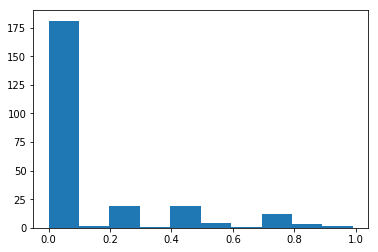

In [24]:
percentNa = df.isna().sum()/ len(df)
plt.hist(percentNa)

In [25]:
cleanNumericColumn(df, params.lowPercentColumns, createFlag=False)
cleanNumericColumn(df, params.midPercentColumns, createFlag=True)

(array([234.,   0.,   0.,   1.,   4.,   3.,   1.,  12.,   3.,   2.]),
 array([0.        , 0.09906756, 0.19813512, 0.29720269, 0.39627025,
        0.49533781, 0.59440537, 0.69347293, 0.7925405 , 0.89160806,
        0.99067562]),
 <a list of 10 Patch objects>)

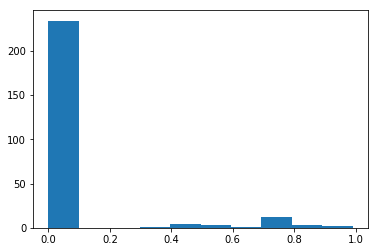

In [26]:
#df.drop(params.highPercentColumns
percentNa = df.isna().sum()/ len(df)
plt.hist(percentNa)

In [44]:
for column, highlyOccuring in params.categoricalOptions.items():
    for item in highlyOccuring:
        if pd.isna(item):
            highlyOccuring.remove(item)
            highlyOccuring.add('nan')
    df[column] = pd.Categorical(df[column].fillna('nan'), categories=list(highlyOccuring))
    #cleanOptions(df, column, highlyOccuring)

In [49]:
collections.Counter(df['id_27'])

Counter({'nan': 1087000, nan: 10231})

In [52]:
df.dtypes[2]

CategoricalDtype(categories=['R', 'W', 'S', 'C', 'H'], ordered=False)

(array([253.,   2.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.01606362, 0.03212724, 0.04819085, 0.06425447,
        0.08031809, 0.09638171, 0.11244533, 0.12850895, 0.14457256,
        0.16063618]),
 <a list of 10 Patch objects>)

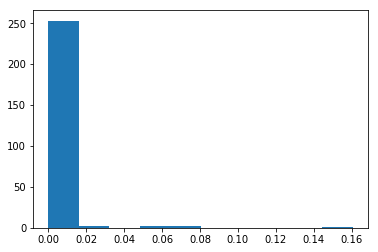

In [53]:
#df.drop(params.highPercentColumns
percentNa = df.isna().sum()/ len(df)
plt.hist(percentNa)

In [16]:
#tmp = df[params.]
#a = set(params.midAndLowPercentColumns)
#a.remove('isFraud')
#tmp = df.[list(a)]
#cleanNumericColumn(df, tmp.columns[tmp.isna().sum() > 0], createFlag=False) 

In [17]:
##tmp = df[params.]
##a.remove('isFraud')
#tmp = df[params.categoricalColumns]
#for column in tmp.columns[tmp.isna().sum() > 0]:

In [54]:
#df_new = pd.get_dummies(df, columns=params.categoricalColumns)
#for key, value in params.categoricalOptions.items():
df_new = pd.get_dummies(df, columns=params.categoricalColumns, dummy_na=False)

In [56]:
df_new.shape

(1097231, 336)

(array([339.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.00093706, 0.00187412, 0.00281118, 0.00374824,
        0.0046853 , 0.00562236, 0.00655942, 0.00749648, 0.00843354,
        0.0093706 ]),
 <a list of 10 Patch objects>)

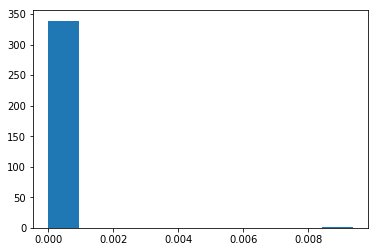

In [19]:
#df.drop(params.highPercentColumns
percentNa = df_new.isna().sum()/ len(df_new)
plt.hist(percentNa)

In [20]:
cleanNumericColumn(df_new, df_new.columns[df_new.isna().sum()>0], createFlag=False)

(array([  0.,   0.,   0.,   0.,   0., 340.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

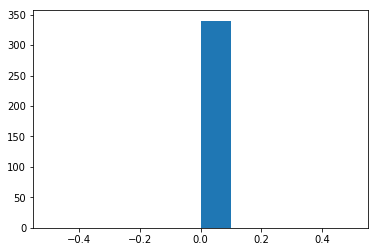

In [21]:
#df.drop(params.highPercentColumns
percentNa = df_new.isna().sum()/ len(df_new)
plt.hist(percentNa)

In [50]:
#df_train = pd.read_pickle('data/dataframe_v04.pd')
#pd.to_pickle(df_new2, 'data/dataframe_test_v04.pd')

In [30]:
traincols = set(df_train.columns)

In [31]:
testcols = set(df_new.columns)

In [32]:
print(traincols - testcols)
print(testcols - traincols)

{'isFraud'}
set()


In [33]:
df_new.shape

(506691, 340)

In [43]:
indices = df_train.columns[1:] != df_new2.columns

In [44]:
df_train.columns[1:][indices]

Index([], dtype='object')

In [45]:
df_new2.columns[indices]

Index([], dtype='object')

In [46]:
set(df_train.columns[1:][indices])-set( df_new.columns[indices])

set()

In [41]:
df_new2 = df_new[df_train.columns[1:]]

In [42]:
df_new2.shape

(506691, 340)

In [76]:
df_train.shape

(590540, 374)

In [77]:
df_new.shape

(506691, 373)

In [83]:
len(df_train.columns)

374

In [94]:
set(df_new.columns)-set(df_train.columns)

set()

In [96]:
set(df_train.columns)-set(df_new.columns)

{'isFraud'}

In [104]:
df_new[df_train.columns[2:]].shape

(506691, 424)

In [24]:
for column in df_new.columns[1:]:
    if len(df_new[column].shape)>1:
        print(column)

In [26]:
df_new['DeviceType_nan']

TransactionID
3663549    0
3663550    0
3663551    0
3663552    0
3663553    0
          ..
4170235    0
4170236    0
4170237    0
4170238    0
4170239    0
Name: DeviceType_nan, Length: 506691, dtype: uint8

In [27]:
df_new['DeviceType_nan']

TransactionID
3663549    0
3663550    0
3663551    0
3663552    0
3663553    0
          ..
4170235    0
4170236    0
4170237    0
4170238    0
4170239    0
Name: DeviceType_nan, Length: 506691, dtype: uint8

In [117]:
df1.shape

(506691, 392)

In [118]:
df2.shape

(141907, 40)

In [49]:
df_new2.columns[df_new2.columns!=df_train.columns[1:]]

Index([], dtype='object')

In [129]:
df['DeviceType']

TransactionID
3663549       NaN
3663550       NaN
3663551       NaN
3663552       NaN
3663553       NaN
            ...  
4170235       NaN
4170236    mobile
4170237       NaN
4170238       NaN
4170239    mobile
Name: DeviceType, Length: 506691, dtype: category
Categories (3, object): [desktop, mobile, nan]

In [152]:
pd.get_dummies(df['DeviceInfo'], dummy_na=False).sample(10)

DeviceInfo,nan,Trident/7.0,iOS Device,Windows,MacOS
TransactionID,,,,,
3728372,0,0,0,0,0
4009092,0,0,0,0,0
4113330,0,0,0,0,0
3948895,0,0,0,0,0
3766285,0,0,0,0,0
4018040,0,0,0,0,0
4028524,0,0,0,0,1
4021889,0,0,0,0,0
4162621,0,0,0,0,0


In [64]:
df_new[trainSize:].to_pickle('data/dataframe_test_v05.pd')